## **GRIP : THE SPARKS FOUNDATION**

### **Author: Aishwarya Khairnar**
##### Linkedin: www.linkedin.com/in/aishwaryak3012


### **DATA SCIENCE & BUSINESS ANALYTICS INTERN**

  
### **Task 1: Prediction using Supervised ML**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

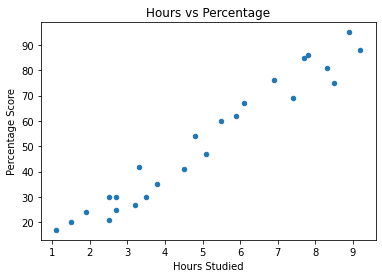

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', kind="scatter")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
hours = data['Hours']
scores = data['Scores']

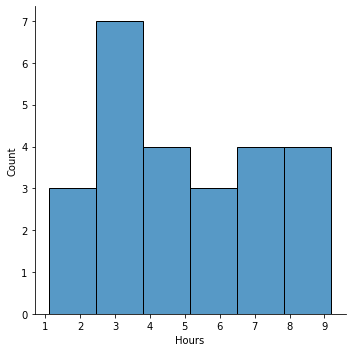

In [ ]:
sns.displot(hours)

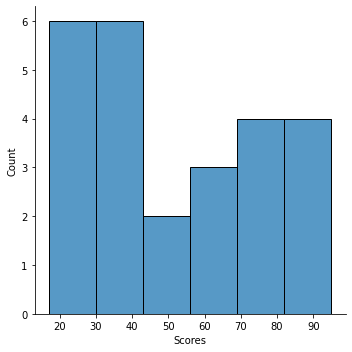

In [ ]:
sns.displot(scores)

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

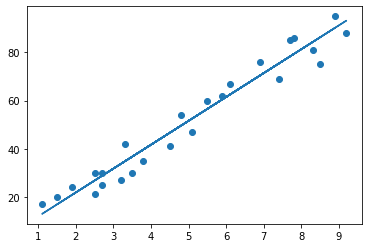

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


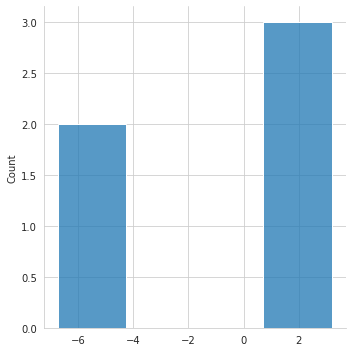

In [ ]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.show()

### **What should be the predict score if student studies for the 9.25 hrs/day**

In [ ]:
h = 9.25
s = regressor.predict([[h]])
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(s[0]))
print("If a student studies for {} hours per day then he or she will score {} % in exam".format(h,s))

No of Hours = 9.25
Predicted Score = 93.69173248737539
If a student studies for 9.25 hours per day then he or she will score [93.69173249] % in exam


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
from sklearn.metrics import r2_score  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("R2 score:",r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354
